In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from tensorflow import keras
###
from keras import Sequential
from keras.layers import Dense,Dropout

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# CIFAR-10 Datasets

In [4]:
batch1 = "/content/data_batch_1"
batch2 = "/content/data_batch_2"
batch3 = "/content/data_batch_3"
meta = "/content/batches.meta"
test =  "/content/test_batch"


data_batch_1 = unpickle(batch1)
data_batch_2 = unpickle(batch2)
data_batch_3 = unpickle(batch3)
meta_data = unpickle(meta)
test_raw_data = unpickle(test)



In [5]:
# Loading Actual Test Data

actual_test_data = np.load("/content/test_additional.npy")
actual_test_data = actual_test_data / 255
actual_test_label = np.load("/content/labels.npy")

In [7]:
data_batch_1[b'data'].shape # We have 10,000 images of size 3072

(10000, 3072)

In [8]:
# To extract label-names:
def extract_classnames(data_meta):
  #Extract the byte strings:
  byte_strings = data_meta[b'label_names']

  #Decode the byte strings to regular strings
  classnames = [bs.decode('utf-8') for bs in byte_strings]

  return classnames

# To extract and reshape data:
def reshape(data_batch):
  data = data_batch[b'data']
  data = data.reshape(len(data),3,32,32).transpose(0,2,3,1) # (10,000 , 3072) -> (10,000 , 3 , 32 , 32) -> (10,000 , 32 32 , 3)
  return data

# To extract labels:
def extract_labels(data_batch):
  labels = data_batch[b'labels']
  return labels

# Extracting Label-names
classnames = extract_classnames(meta_data)
print(classnames)

#To plot images:
def plot_sample(X,Y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.title(classnames[Y[index]])
  plt.axis('off')

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
#Extracting Training Labels
label_1 = extract_labels(data_batch_1)
label_2 = extract_labels(data_batch_2)
label_3 = extract_labels(data_batch_3)

train_label = np.concatenate((label_1, label_2, label_3), axis=0)

#Extracting Test Labels
test_label = np.array(extract_labels(test_raw_data))


In [10]:
#Extracting Training data
data_1 = reshape(data_batch_1)
data_2 = reshape(data_batch_2)
data_3 = reshape(data_batch_3)

train_data = np.concatenate((data_1,data_2,data_3),axis = 0)
train_data = train_data / 255 #Normalizing

#Extracting Test data
test_data = reshape(test_raw_data)
test_data = test_data/255 #Normalizing
train_data.shape

(30000, 32, 32, 3)

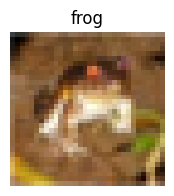

In [11]:
# Checking Sample Image
plot_sample(train_data,train_label,0)

# Using Sigmoid Activation method

In [12]:
#build Cnn
cnn = models.Sequential([

  #convolution+Relu
  layers.Conv2D(filters = 64 ,kernel_size = (3,3),activation = 'sigmoid',input_shape = (32,32,3)),
  layers.MaxPooling2D((2,2)), #pooling

  #Convolution+ReLu
  layers.Conv2D(filters = 64 ,kernel_size = (3,3),activation = 'sigmoid',input_shape = (32,32,3)),
  layers.MaxPooling2D((2,2)), #pooling
  #Dense
  layers.Flatten(),
  layers.Dense(128,activation='sigmoid'),
  layers.Dense(10,activation='softmax')
  ])

In [13]:
#Configuring the learning process before training start
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [14]:
#Training
cnn.fit(train_data,train_label,epochs= 15)

Epoch 1/15
938/938 [==============================] - 8s 5ms/step - loss: 2.0848 - accuracy: 0.2410
Epoch 2/15
938/938 [==============================] - 3s 4ms/step - loss: 1.7973 - accuracy: 0.3563
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 1.6072 - accuracy: 0.4261
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 1.4779 - accuracy: 0.4705
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 1.4072 - accuracy: 0.4963
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 1.3511 - accuracy: 0.5157
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 1.2971 - accuracy: 0.5360
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 1.2507 - accuracy: 0.5517
Epoch 9/15
938/938 [==============================] - 4s 4ms/step - loss: 1.2052 - accuracy: 0.5704
Epoch 10/15
938/938 [==============================] - 4s 4ms/step - loss: 1.1632 - accuracy: 0.5860

## Evaluating Test Set 1

In [15]:
#Evaluating on test set 1
test1_res_sigmoid = cnn.evaluate(test_data,test_label)
print(f"Loss is {test1_res_sigmoid[0]}")
print(f"Accuracy is {test1_res_sigmoid[1] * 100} %")

313/313 [==============================] - 1s 3ms/step - loss: 1.2115 - accuracy: 0.5729
Loss is 1.2114815711975098
Accuracy is 57.28999972343445 %


In [16]:
#Classification report for test set 1 (Using Sigmoid)
test_predictions1_sigmoid = cnn.predict(test_data)
test_classes = [np.argmax(ele) for ele in test_predictions1_sigmoid ]
test_classes_name = [classnames[i] for i in test_classes]
print("Classification report-Sigmoid (Test Set 1) \n",classification_report(test_label,test_classes))

313/313 [==============================] - 1s 2ms/step
Classification report-Sigmoid (Test Set 1) 
               precision    recall  f1-score   support

           0       0.62      0.69      0.65      1000
           1       0.70      0.69      0.70      1000
           2       0.45      0.40      0.42      1000
           3       0.42      0.41      0.42      1000
           4       0.48      0.54      0.51      1000
           5       0.52      0.46      0.49      1000
           6       0.72      0.56      0.63      1000
           7       0.60      0.68      0.64      1000
           8       0.62      0.68      0.65      1000
           9       0.61      0.61      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

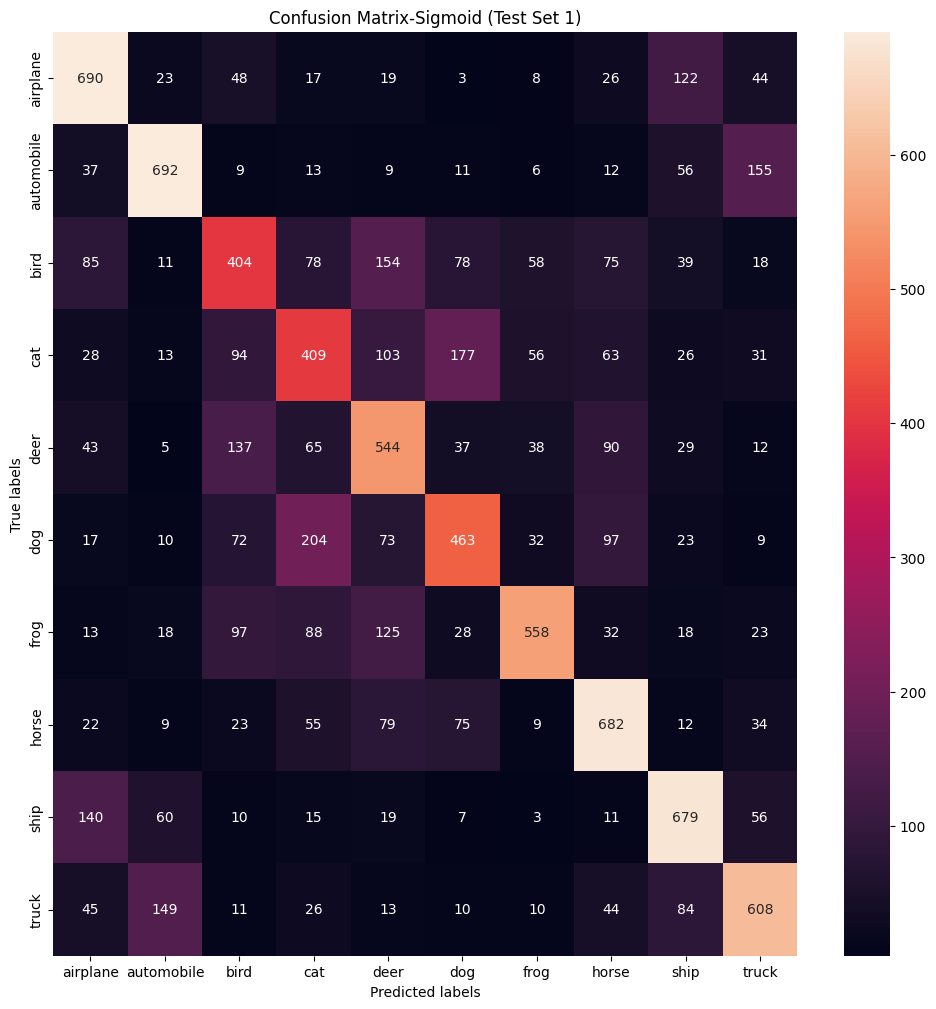

In [17]:
# Confusion Matrix for test set 1 (Using Sigmoid)
confusion_matrix1_sigmoid = confusion_matrix(test_label,test_classes)

plt.figure(figsize=(12, 12))
ax= plt.subplot()
sns.heatmap(confusion_matrix1_sigmoid, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Sigmoid (Test Set 1)')
ax.xaxis.set_ticklabels(classnames); ax.yaxis.set_ticklabels(classnames)

## Evaluating Test Set 2

In [18]:
#Evaluating on test set 2
test2_res_sigmoid = cnn.evaluate(actual_test_data,actual_test_label)
print(f"Loss is {test2_res_sigmoid[0]}")
print(f"Accuracy is {test2_res_sigmoid[1] * 100} %")

313/313 [==============================] - 1s 3ms/step - loss: 1.2361 - accuracy: 0.5644
Loss is 1.2361371517181396
Accuracy is 56.44000172615051 %


In [19]:
test_predictions2_sigmoid = cnn.predict(actual_test_data)
test_classes = [np.argmax(ele) for ele in test_predictions2_sigmoid ]
test_classes_name = [classnames[i] for i in test_classes]
print("Classification report-Sigmoid (Test Set 2) \n",classification_report(actual_test_label,test_classes))


313/313 [==============================] - 1s 2ms/step
Classification report-Sigmoid (Test Set 2) 
               precision    recall  f1-score   support

           0       0.60      0.68      0.64      1000
           1       0.70      0.68      0.69      1000
           2       0.45      0.38      0.41      1000
           3       0.42      0.39      0.41      1000
           4       0.46      0.54      0.50      1000
           5       0.51      0.46      0.49      1000
           6       0.71      0.56      0.63      1000
           7       0.59      0.68      0.63      1000
           8       0.62      0.66      0.64      1000
           9       0.60      0.61      0.60      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

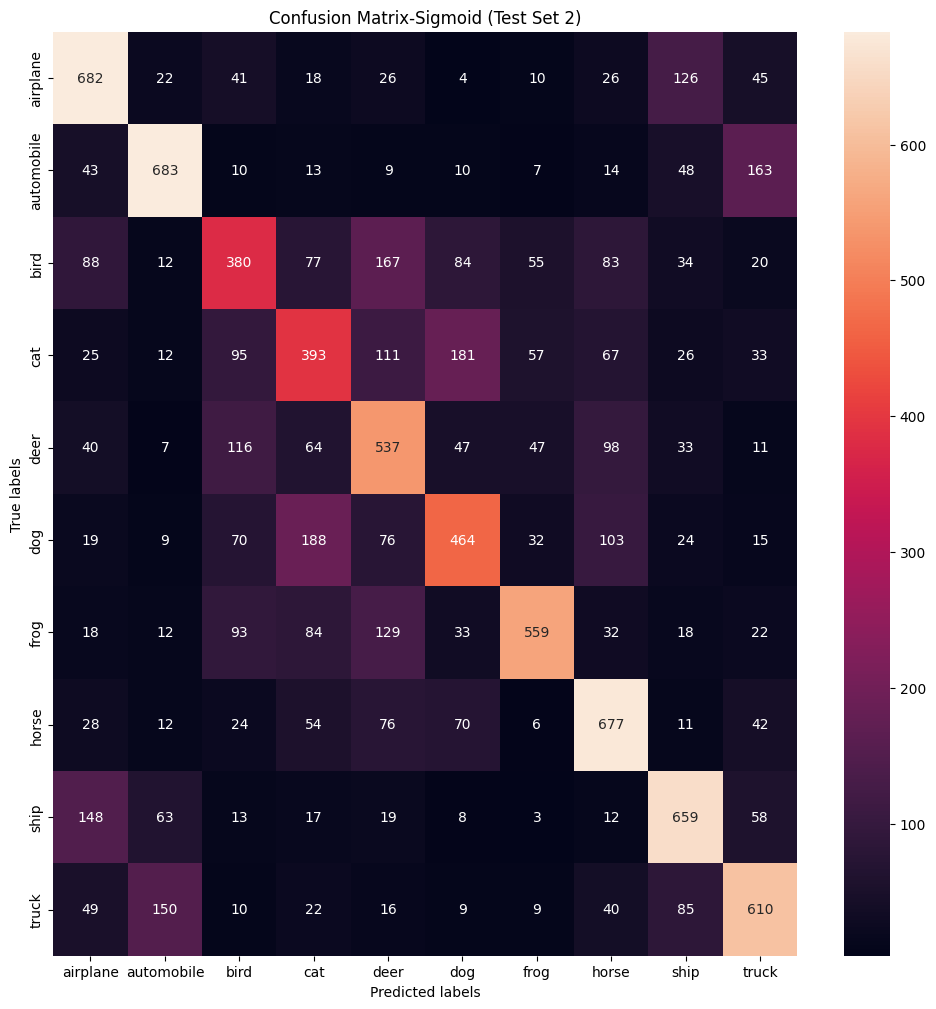

In [20]:
confusion_matrix2_sigmoid = confusion_matrix(actual_test_label,test_classes)

plt.figure(figsize=(12, 12))
ax= plt.subplot()
sns.heatmap(confusion_matrix2_sigmoid, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Sigmoid (Test Set 2)')
ax.xaxis.set_ticklabels(classnames); ax.yaxis.set_ticklabels(classnames)

# Using ReLU activision function:

In [21]:
#build Cnn
cnn = models.Sequential([

  #convolution+Relu
  layers.Conv2D(filters = 64 ,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
  layers.MaxPooling2D((2,2)), #pooling

  #Convolution+ReLu
  layers.Conv2D(filters = 64 ,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
  layers.MaxPooling2D((2,2)), #pooling
  #Dense
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(10,activation='softmax')
  ])

In [22]:
#Configuring the learning process before training start
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [23]:
#Training
cnn.fit(train_data,train_label,epochs= 15)

Epoch 1/15
938/938 [==============================] - 5s 4ms/step - loss: 1.5712 - accuracy: 0.4346
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 1.2208 - accuracy: 0.5675
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 1.0653 - accuracy: 0.6274
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.9512 - accuracy: 0.6665
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 0.8721 - accuracy: 0.6969
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 0.7956 - accuracy: 0.7218
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.7377 - accuracy: 0.7396
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.6745 - accuracy: 0.7654
Epoch 9/15
938/938 [==============================] - 4s 4ms/step - loss: 0.6178 - accuracy: 0.7835
Epoch 10/15
938/938 [==============================] - 4s 4ms/step - loss: 0.5652 - accuracy: 0.7999

## Evaluating Test Set 1

In [24]:
# Evaluating on test set 1
test1_res_Relu = cnn.evaluate(test_data,test_label)
print(f"Loss is {test1_res_Relu[0]}")
print(f"Accuracy is {test1_res_Relu[1] * 100} %")


313/313 [==============================] - 1s 2ms/step - loss: 1.3229 - accuracy: 0.6618
Loss is 1.322889804840088
Accuracy is 66.18000268936157 %


In [25]:
test_predictions1_Relu = cnn.predict(test_data)
test_classes = [np.argmax(ele) for ele in test_predictions1_Relu ]
test_classes_name = [classnames[i] for i in test_classes]
print("Classification report-Relu (Test Set 1) \n",classification_report(test_label,test_classes))

313/313 [==============================] - 1s 2ms/step
Classification report-Relu (Test Set 1) 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.72      0.82      0.77      1000
           2       0.59      0.52      0.55      1000
           3       0.44      0.53      0.48      1000
           4       0.64      0.59      0.61      1000
           5       0.54      0.53      0.53      1000
           6       0.68      0.80      0.74      1000
           7       0.77      0.68      0.72      1000
           8       0.77      0.80      0.79      1000
           9       0.75      0.70      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

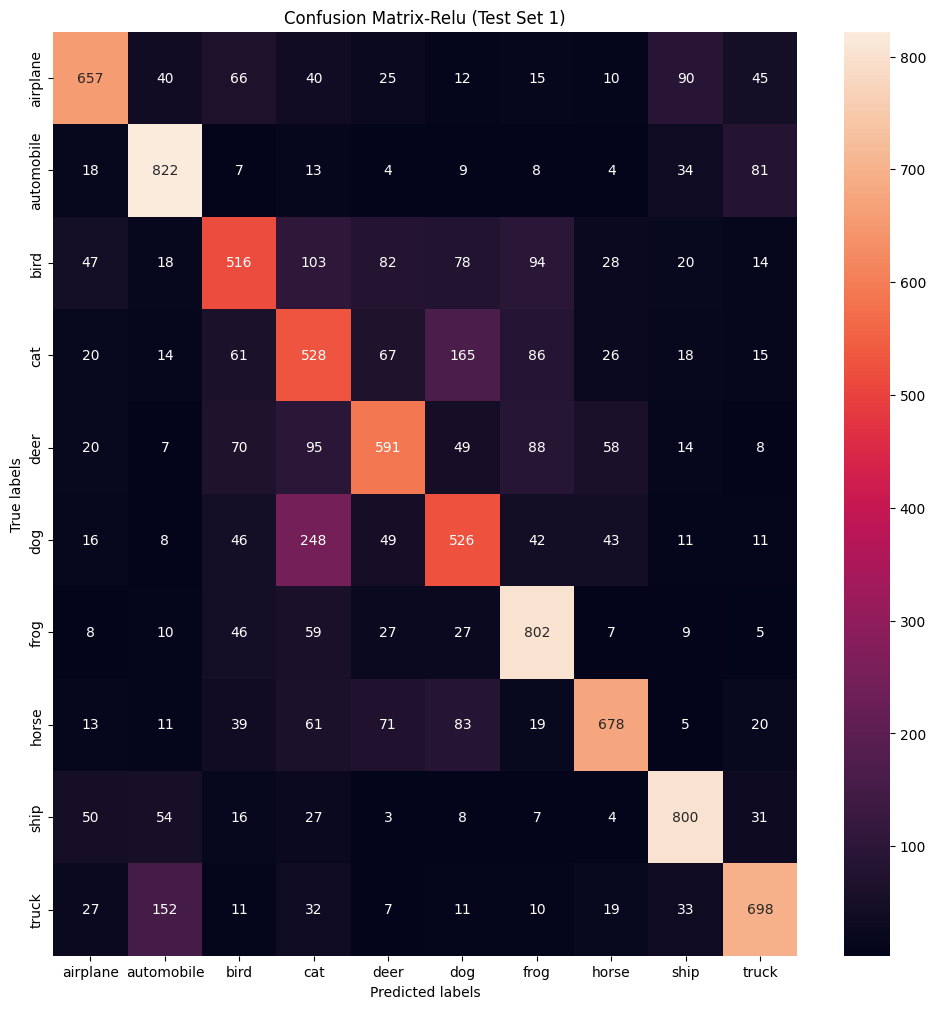

In [26]:
confusion_matrix1_Relu = confusion_matrix(test_label,test_classes)

plt.figure(figsize=(12, 12))
ax= plt.subplot()
sns.heatmap(confusion_matrix1_Relu, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Relu (Test Set 1)')
ax.xaxis.set_ticklabels(classnames); ax.yaxis.set_ticklabels(classnames)

## Evaluating Test Set 2

In [27]:
#Evaluating on test set 2
test2_res_Relu = cnn.evaluate(actual_test_data,actual_test_label)
print(f"Loss is {test2_res_Relu[0]}")
print(f"Accuracy is {test2_res_Relu[1] * 100} %")

313/313 [==============================] - 1s 2ms/step - loss: 1.6362 - accuracy: 0.5927
Loss is 1.6361998319625854
Accuracy is 59.27000045776367 %


In [28]:
test_predictions2_Relu = cnn.predict(actual_test_data)
test_classes = [np.argmax(ele) for ele in test_predictions2_Relu ]
test_classes_name = [classnames[i] for i in test_classes]
print("Classification report-Relu (Test Set 2) \n",classification_report(actual_test_label,test_classes))

313/313 [==============================] - 1s 2ms/step
Classification report-Relu (Test Set 2) 
               precision    recall  f1-score   support

           0       0.73      0.58      0.64      1000
           1       0.64      0.80      0.71      1000
           2       0.54      0.37      0.44      1000
           3       0.42      0.43      0.43      1000
           4       0.54      0.48      0.51      1000
           5       0.58      0.43      0.49      1000
           6       0.45      0.89      0.60      1000
           7       0.76      0.61      0.68      1000
           8       0.79      0.66      0.71      1000
           9       0.67      0.69      0.68      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

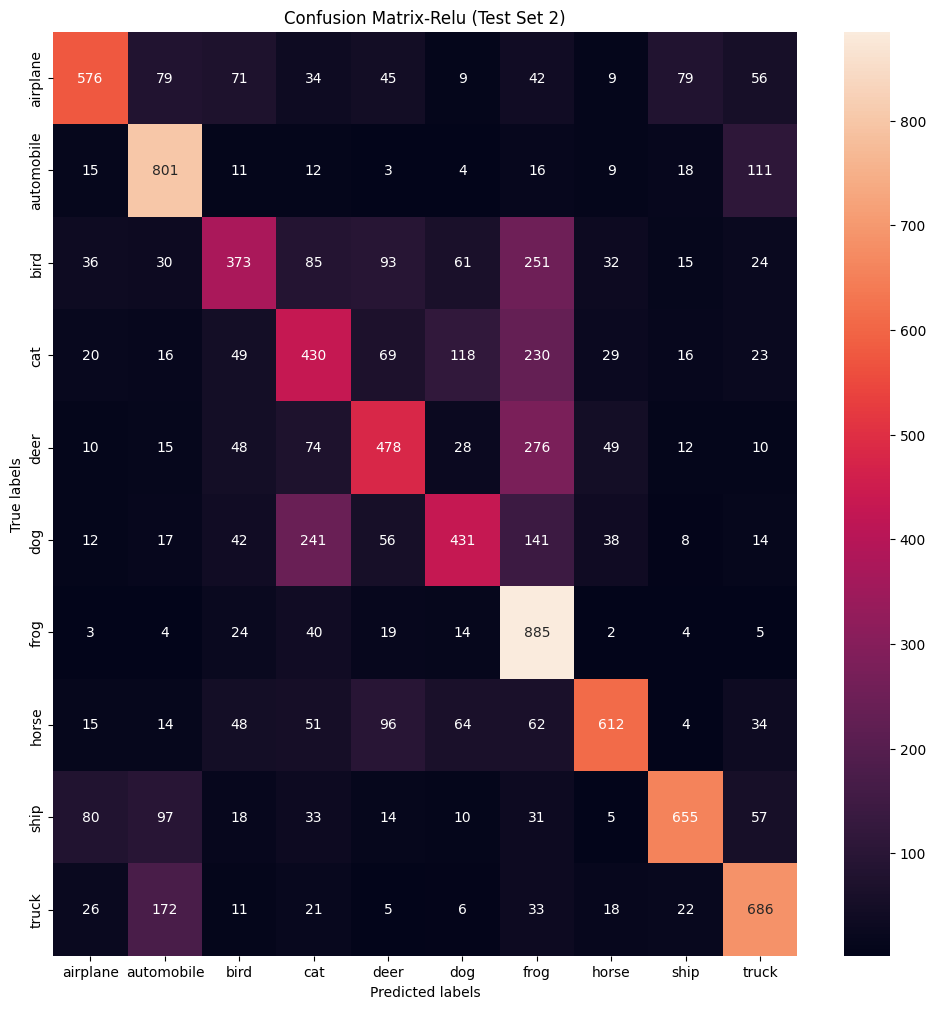

In [29]:
confusion_matrix2_Relu = confusion_matrix(actual_test_label,test_classes)

plt.figure(figsize=(12, 12))
ax= plt.subplot()
sns.heatmap(confusion_matrix2_Relu, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Relu (Test Set 2)')
ax.xaxis.set_ticklabels(classnames); ax.yaxis.set_ticklabels(classnames)